In [32]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
import matplotlib.pyplot as plt
import pandas as pd

import config

In [33]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [34]:
def plot_electricity_load(true_values: any, predicted_values: any) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Electricity load [MW]')
    plt.grid(True)
    plt.title('Electricity Consumption Prediction')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [35]:
def plot_electricity_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [36]:
def plot_electricity_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [37]:
def plot_electricity_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [38]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error [MW]')
    # plt.title('Electricity Consumption Prediction')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [39]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('Prediction error [MW]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [40]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error [MW]')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case 1')
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

In [41]:
def plot_total_prediction_absolute_error_per_period(error_abs_value: any, period: int) -> None:
    pass

In [42]:
def plot_total_prediction_absolute_error_per_period_by_mean_std(error_abs_value: any, sampling_interval: int, period: int) -> None:
    pass

In [43]:
def plot_cell_synapases_history_by_mean_std(cell_synapases_history_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # start from zero
    time_points = range(config.cell_synapases_start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = cell_synapases_history_values.mean(axis=1)
    std_values = cell_synapases_history_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Cell Synapases')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('Cell Synapases History')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [44]:
def plot_cell_synapases_history(cell_synapases_history_values: any) -> None:
    plt.figure(figsize=(10, 6))

    for i in range(config.nTrial):
        plt.plot(cell_synapases_history_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Cell Synapases History')
    plt.title('Cell Synapases History')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [45]:
def calculate_total_absolute_error(error_abs_value: any) -> float:
    total_absolute_errors = error_abs_value.sum(axis=0)
    tae = total_absolute_errors.mean()
    return tae

def plot_tae_list(tae_list: list[float]) -> None:
    num_cases = len(tae_list)
    x_labels = [f"Case {i+1}" for i in range(num_cases)]
    x = range(1, len(tae_list)+1)
    
    plt.plot(x, tae_list, marker='o', markersize=6, linestyle='-', label='TAE')
    plt.xlabel('Cases')
    plt.ylabel('TAE')
    plt.xticks(x, x_labels)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    min_y_value = min(tae_list)
    plt.axhline(y=min_y_value, color='red', linestyle='--')
    plt.show()

In [46]:
def calculate_mean_absolute_error(error_abs_value: any) -> float:
    mean_by_column = error_abs_value.mean(axis=0)
    total_mean_by_column = mean_by_column.sum()
    mae = total_mean_by_column / config.nTrial
    return mae

def plot_mae_list(mae_list: list[float]) -> None:
    num_cases = len(mae_list)
    x_labels = [f"Case {i+1}" for i in range(num_cases)]
    x = range(1, len(mae_list)+1)
    
    plt.plot(x, mae_list, marker='o', markersize=6, linestyle='-', label='MAE')
    plt.xlabel('Cases')
    plt.ylabel('MAE')
    plt.xticks(x, x_labels)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    min_y_value = min(mae_list)
    plt.axhline(y=min_y_value, color='red', linestyle='--')
    plt.show()

In [47]:
def plot_evaluation_metric(mae_list: list[float], tae_list: list[float]) -> None:
    num_cases = len(mae_list)
    x_labels = [f"Case {i+1}" for i in range(num_cases)]
    x = range(1, len(mae_list)+1)
    
    plt.plot(x, tae_list, marker='o', markersize=6, linestyle='-', label='TAE')
    plt.plot(x, mae_list, marker='o', markersize=6, linestyle='-', label='MAE')

    plt.xlabel('Cases')
    plt.ylabel('Prediction error [MW]')
    plt.xticks(x, x_labels)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    min_y_value = min(tae_list)
    plt.axhline(y=min_y_value, color='red', linestyle='--')
    min_y_value = min(mae_list)
    plt.axhline(y=min_y_value, color='red', linestyle='--')
    plt.show()

## Init

In [48]:
print(config.ROOT_PATH)

/home/zhangqiang/work/repos/time-series/utils


## Case 1

### Read prediction results file

In [49]:
case1_df = load_csv_data(config.case1_predict_results_path)
case1_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [50]:
case1_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
829826,414911,NaN,NaN,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,NaN
829827,414912,NaN,NaN,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,NaN
829828,414913,NaN,NaN,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,NaN
829829,414914,NaN,NaN,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,NaN
829830,414915,NaN,NaN,130.9370,130.9370,130.9370,130.9370,130.9370,130.9370,130.9370,130.9370,130.9370,130.9370,NaN


In [51]:
case1_df.iloc[414911:414920]

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
414911,414912,5926.45,NaN,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,NaN
414912,414913,5833.45,NaN,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,NaN
414913,414914,5740.00,NaN,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,NaN
414914,414915,5646.60,NaN,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,NaN
414915,414916,5541.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414916,1,NaN,NaN,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,NaN
414917,2,NaN,NaN,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,NaN
414918,3,NaN,NaN,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,NaN
414919,4,NaN,NaN,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,NaN


In [52]:
# true values need to be shifted by 1
true_values = case1_df["TRUE"][config.start+1:config.end+1+1]
true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [53]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case1_predicted_values = case1_df[predicted_column][config.start:config.end+1]
case1_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5610.02,5610.02,5610.02,5610.02,5610.02,5610.02,5610.02,5610.02,5610.02,5610.02
414820,5483.51,5483.51,5483.51,5483.51,5483.51,5483.51,5483.51,5483.51,5483.51,5483.51
414821,5379.15,5379.15,5379.15,5379.15,5379.15,5379.15,5379.15,5379.15,5379.15,5379.15
414822,5292.09,5292.09,5292.09,5292.09,5292.09,5292.09,5292.09,5292.09,5292.09,5292.09
414823,5219.61,5219.61,5219.61,5219.61,5219.61,5219.61,5219.61,5219.61,5219.61,5219.61
...,...,...,...,...,...,...,...,...,...,...
414910,5997.91,5997.91,5997.91,5997.91,5997.91,5997.91,5997.91,5997.91,5997.91,5997.91
414911,5932.70,5932.70,5932.70,5932.70,5932.70,5932.70,5932.70,5932.70,5932.70,5932.70
414912,5843.18,5843.18,5843.18,5843.18,5843.18,5843.18,5843.18,5843.18,5843.18,5843.18
414913,5760.32,5760.32,5760.32,5760.32,5760.32,5760.32,5760.32,5760.32,5760.32,5760.32


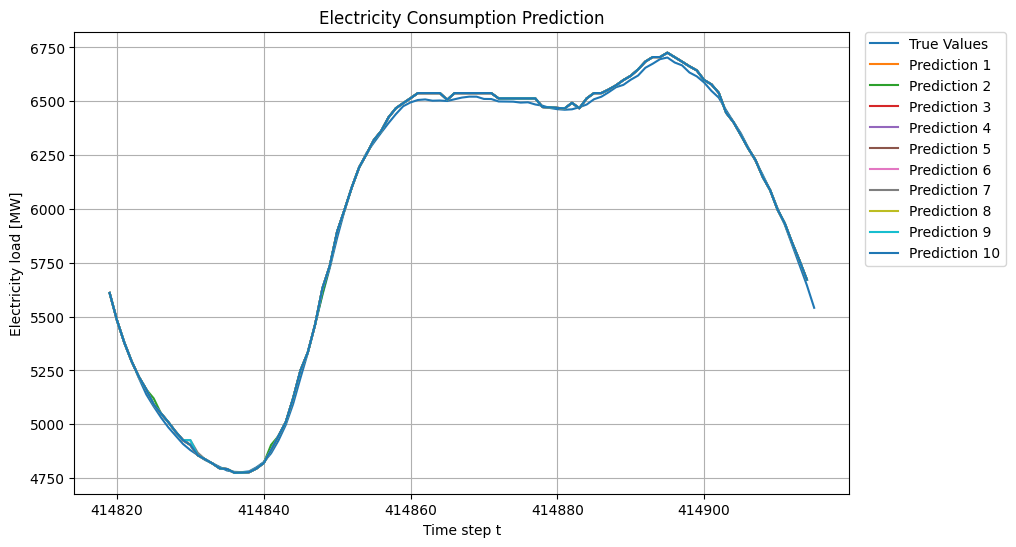

In [54]:
plot_electricity_load(true_values, case1_predicted_values)

In [55]:
# plot_electricity_load_by_mean_max_min(true_values, case1_predicted_values, 10)

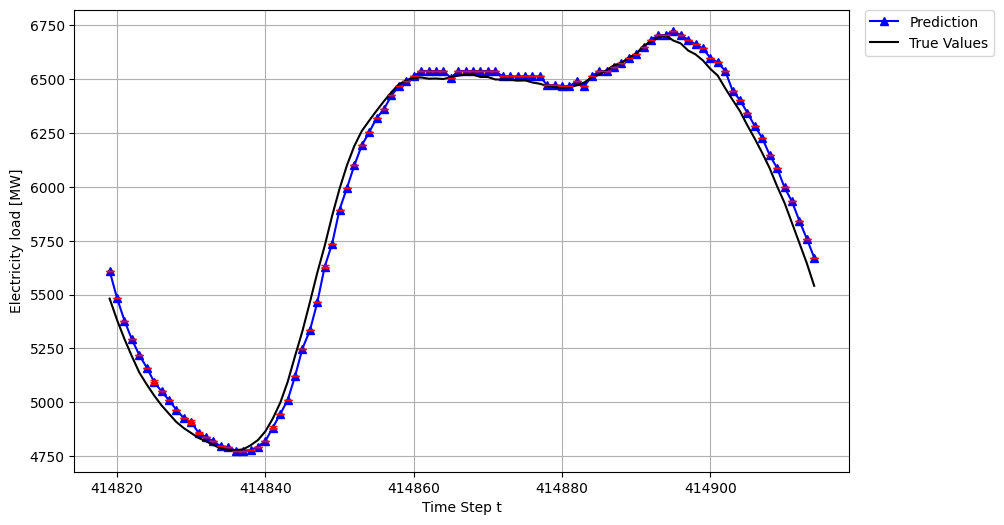

In [56]:
plot_electricity_load_by_mean_std(true_values, case1_predicted_values, sampling_interval=config.sampling_interval)

In [57]:
# abs(outputdata[n][a] - inputdata[a+1])
case1_error_abs_value = case1_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case1_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,128.2900,128.2900,128.2900,128.2900,128.2900,128.2900,128.2900,128.2900,128.2900,128.2900
829736,101.1320,101.1320,101.1320,101.1320,101.1320,101.1320,101.1320,101.1320,101.1320,101.1320
829737,85.2793,85.2793,85.2793,85.2793,85.2793,85.2793,85.2793,85.2793,85.2793,85.2793
829738,78.3694,78.3694,78.3694,78.3694,78.3694,78.3694,78.3694,78.3694,78.3694,78.3694
829739,81.0632,81.0632,81.0632,81.0632,81.0632,81.0632,81.0632,81.0632,81.0632,81.0632
...,...,...,...,...,...,...,...,...,...,...
829826,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631
829827,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539
829828,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790
829829,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220


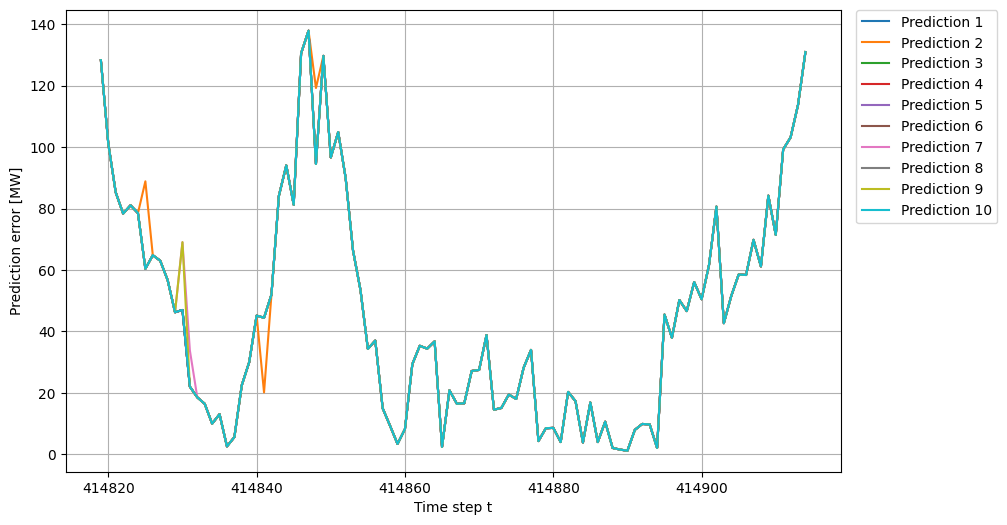

In [58]:
plot_prediction_absolute_error(case1_error_abs_value)

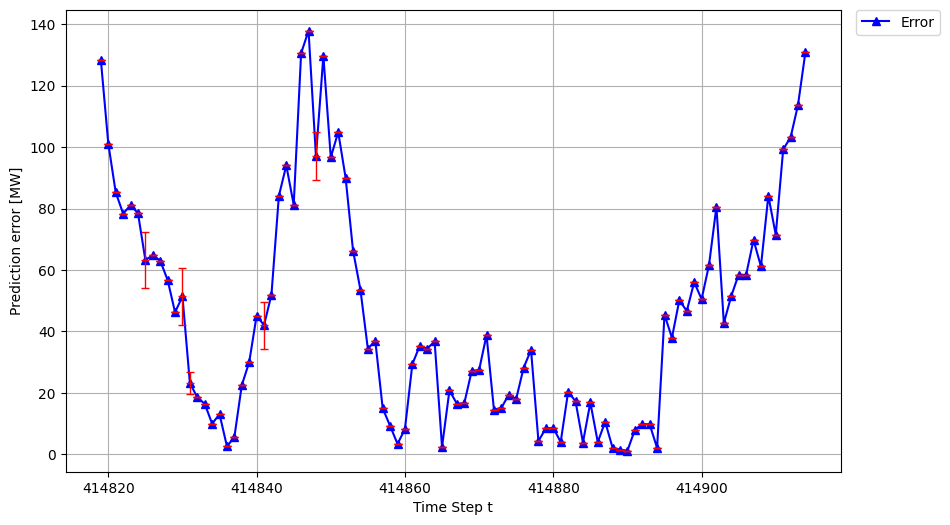

In [59]:
plot_prediction_absolute_error_by_mean_std(case1_error_abs_value, sampling_interval=config.sampling_interval)

In [60]:
tae = calculate_total_absolute_error(case1_error_abs_value)
print("TAE:", tae)

TAE: 4375.183599999999


In [61]:
mae = calculate_mean_absolute_error(case1_error_abs_value)
print("MAE:", mae)

MAE: 45.574829166666674


## Case 2

In [62]:
case2_df = load_csv_data(config.case2_predict_results_path)
case2_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../output/electric-consumption/case2/InputOutput_BUon_BOon_NY15min_cells32_n421_r13d08.csv'

In [ ]:
# true values need to be shifted by 1
true_values = case2_df["TRUE"][config.start+1:config.end+1+1]
true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [ ]:
case2_predicted_values = case2_df[predicted_column][config.start:config.end+1]
case2_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72
414820,5693.13,5693.13,5693.13,5693.13,5177.34,5693.13,5693.13,5693.13,5693.13,5693.13
414821,5469.60,5177.34,5693.13,5469.60,5177.34,5177.34,5469.60,5693.13,5469.60,5469.60
414822,5443.43,5443.43,5443.43,4931.10,5443.43,5443.43,5443.43,5443.43,5443.43,5443.43
414823,4931.10,5443.43,4931.10,4931.10,4931.10,4931.10,5212.30,5212.30,5443.43,4931.10
...,...,...,...,...,...,...,...,...,...,...
414910,5738.56,6043.29,6262.61,6262.61,5738.56,6043.29,6262.61,6043.29,5738.56,5738.56
414911,6262.61,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32
414912,5999.86,5426.04,5426.04,5999.86,5999.86,5426.04,5999.86,5999.86,5999.86,5999.86
414913,5999.86,5426.04,5426.04,5999.86,5999.86,5426.04,5426.04,5767.03,5767.03,5426.04


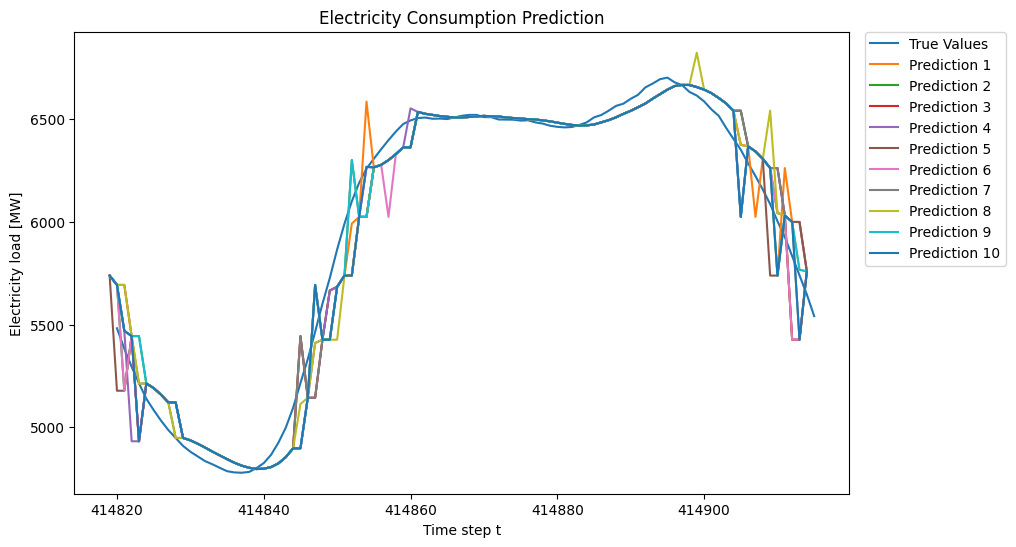

In [ ]:
plot_electricity_load(true_values, case2_predicted_values)

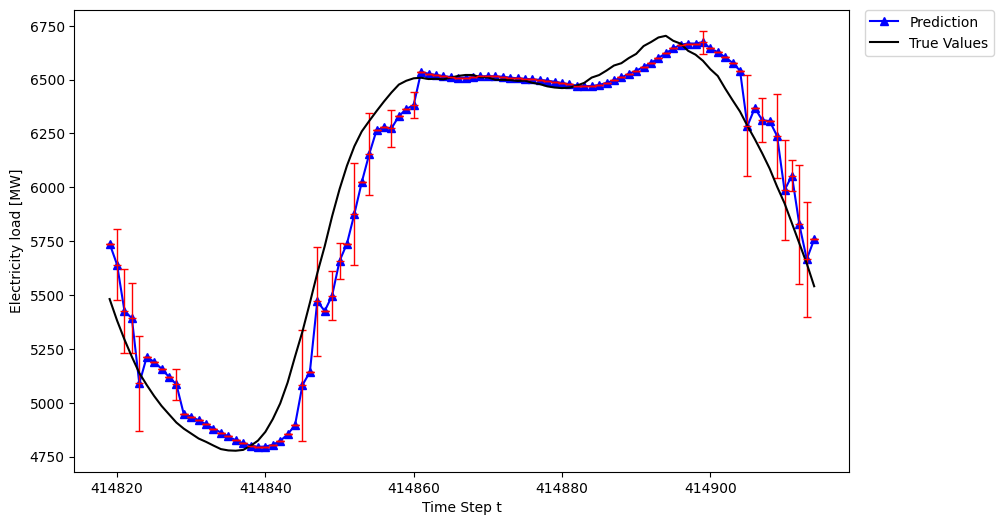

In [ ]:
plot_electricity_load_by_mean_std(true_values, case2_predicted_values, sampling_interval=config.sampling_interval)

In [ ]:
# abs(outputdata[n][a] - inputdata[a+1])
case2_error_abs_value = case2_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case2_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,256.999,256.999,256.999,256.999,256.999,256.999,256.9990,256.9990,256.999,256.999
829736,310.757,310.757,310.757,310.757,205.031,310.757,310.7570,310.7570,310.757,310.757
829737,175.728,116.531,399.257,175.728,116.531,116.531,175.7280,399.2570,175.728,175.728
829738,229.710,229.710,229.710,282.620,229.710,229.710,229.7100,229.7100,229.710,229.710
829739,207.445,304.885,207.445,207.445,207.445,207.445,73.7532,73.7532,304.885,207.445
...,...,...,...,...,...,...,...,...,...,...
829826,187.890,116.841,336.164,336.164,187.890,116.841,336.1640,116.8410,187.890,187.890
829827,429.164,197.866,197.866,197.866,197.866,197.866,197.8660,197.8660,197.866,197.866
829828,259.856,313.963,313.963,259.856,259.856,313.963,259.8560,259.8560,259.856,259.856
829829,353.256,220.563,220.563,353.256,353.256,220.563,220.5630,120.4270,120.427,220.563


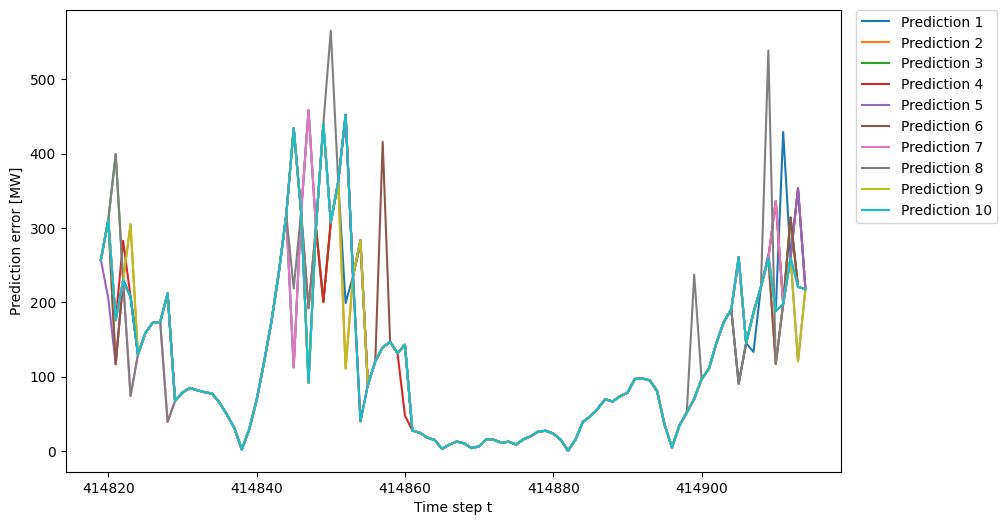

In [ ]:
plot_prediction_absolute_error(case2_error_abs_value)

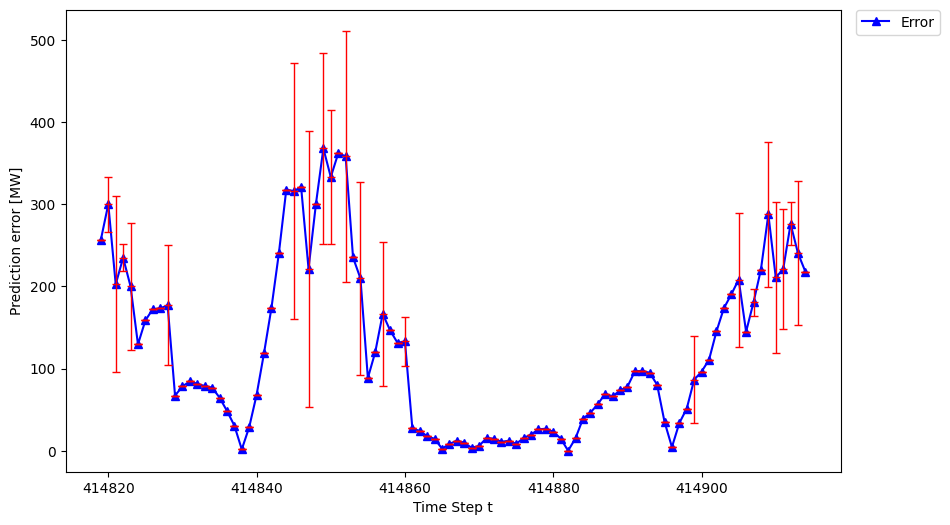

In [ ]:
plot_prediction_absolute_error_by_mean_std(case2_error_abs_value, sampling_interval=config.sampling_interval)

In [ ]:
inf_tae = calculate_total_absolute_error(case2_error_abs_value)
print("TAE:", inf_tae)

TAE: 11648.339733


In [ ]:
inf_mae = calculate_mean_absolute_error(case2_error_abs_value)
print("MAE:", inf_mae)

MAE: 121.33687221875


## Case 3

In [ ]:
case3_df = load_csv_data(config.case3_predict_results_path)
case3_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [ ]:
# true values need to be shifted by 1
true_values = case3_df["TRUE"][config.start+1:config.end+1+1]
true_values

NameError: name 'case3_df' is not defined

In [ ]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case3_predicted_values = case3_df[predicted_column][config.start:config.end+1]
case3_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5685.38,5685.38,5685.38,5685.38,5685.38,5685.38,5685.38,5685.38,5685.38,5685.38
414820,5561.77,5429.45,5429.45,5429.45,5429.45,5429.45,5561.77,5429.45,5429.45,5429.45
414821,5483.39,5483.39,5429.45,5282.19,5429.45,5429.45,5483.39,5282.19,5429.45,5429.45
414822,5429.45,5483.39,5410.12,5282.19,5383.36,5383.36,5383.36,5383.36,5383.36,5483.39
414823,5285.70,5285.70,5285.70,5285.70,5383.36,5285.70,5285.70,5285.70,5285.70,5285.70
...,...,...,...,...,...,...,...,...,...,...
414910,6088.46,5934.57,6088.46,6137.44,6088.46,6088.46,6088.46,6088.46,5983.22,5983.22
414911,5983.22,5859.64,6088.46,6003.26,5983.22,5983.22,5983.22,6003.26,6088.46,5805.65
414912,5932.13,5983.22,5983.22,5932.13,5983.22,5932.13,5983.22,5805.65,5932.13,5932.13
414913,5835.49,5835.49,5835.49,5712.08,5835.49,5835.49,5859.64,5712.08,5835.49,5835.49


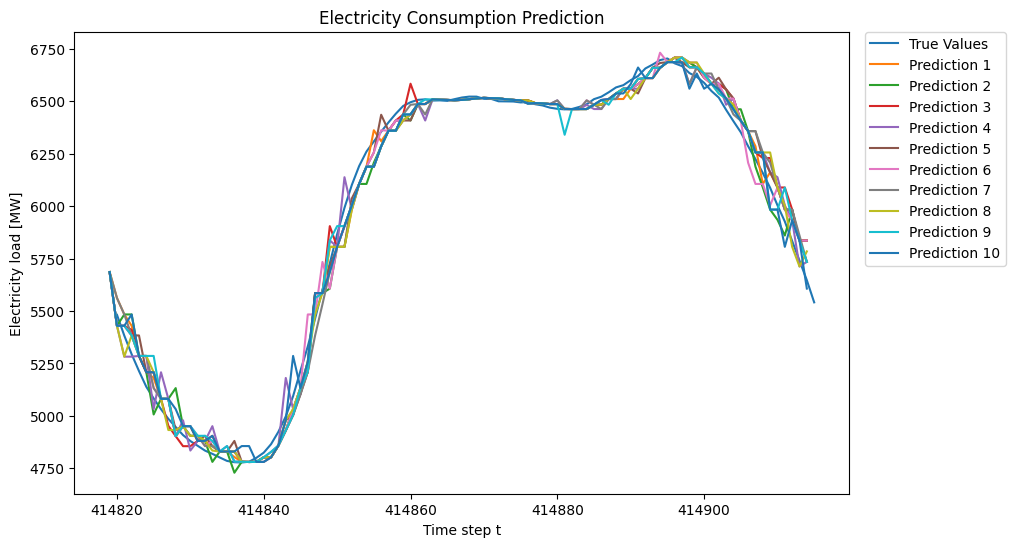

In [ ]:
plot_electricity_load(true_values, case3_predicted_values)

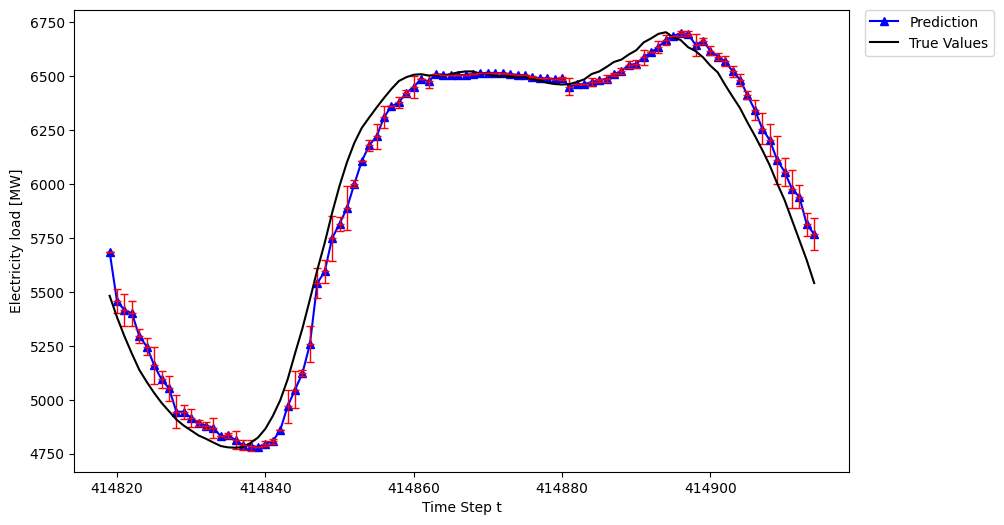

In [ ]:
plot_electricity_load_by_mean_std(true_values, case3_predicted_values, sampling_interval=config.sampling_interval)

In [ ]:
# abs(outputdata[n][a] - inputdata[a+1])
case3_error_abs_value = case3_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case3_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,203.658,203.65800,203.6580,203.6580,203.6580,203.6580,203.658,203.6580,203.6580,203.6580
829736,179.395,47.07560,47.0756,47.0756,47.0756,47.0756,179.395,47.0756,47.0756,47.0756
829737,189.511,189.51100,135.5760,11.6821,135.5760,135.5760,189.511,11.6821,135.5760,135.5760
829738,215.726,269.66100,196.3970,68.4679,169.6360,169.6360,169.636,169.6360,169.6360,269.6610
829739,147.148,147.14800,147.1480,147.1480,244.8110,147.1480,147.148,147.1480,147.1480,147.1480
...,...,...,...,...,...,...,...,...,...,...
829826,162.007,8.11576,162.0070,210.9900,162.0070,162.0070,162.007,162.0070,56.7675,56.7675
829827,149.768,26.18510,255.0070,169.8120,149.7680,149.7680,149.768,169.8120,255.0070,27.8031
829828,192.131,243.21800,243.2180,192.1310,243.2180,192.1310,243.218,65.6469,192.1310,192.1310
829829,188.895,188.89500,188.8950,65.4751,188.8950,188.8950,213.035,65.4751,188.8950,188.8950


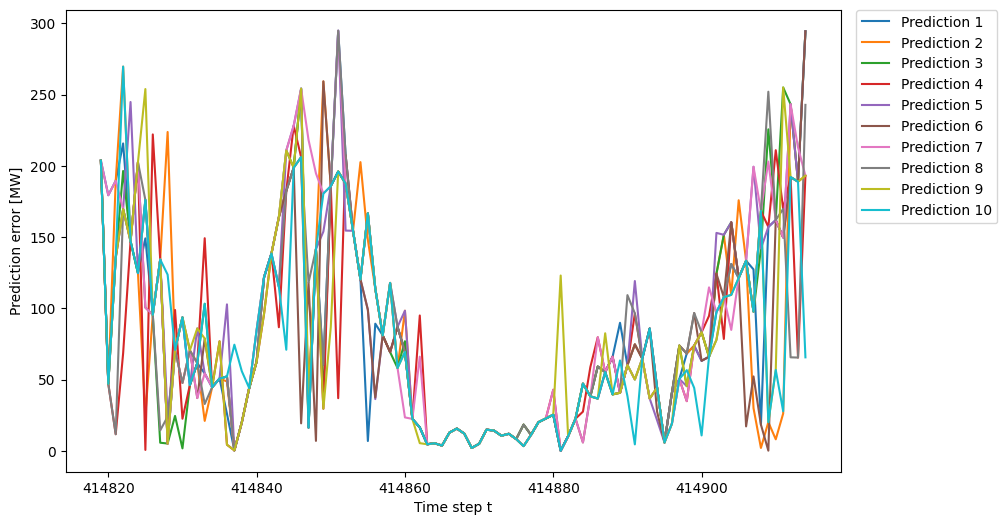

In [ ]:
plot_prediction_absolute_error(case3_error_abs_value)

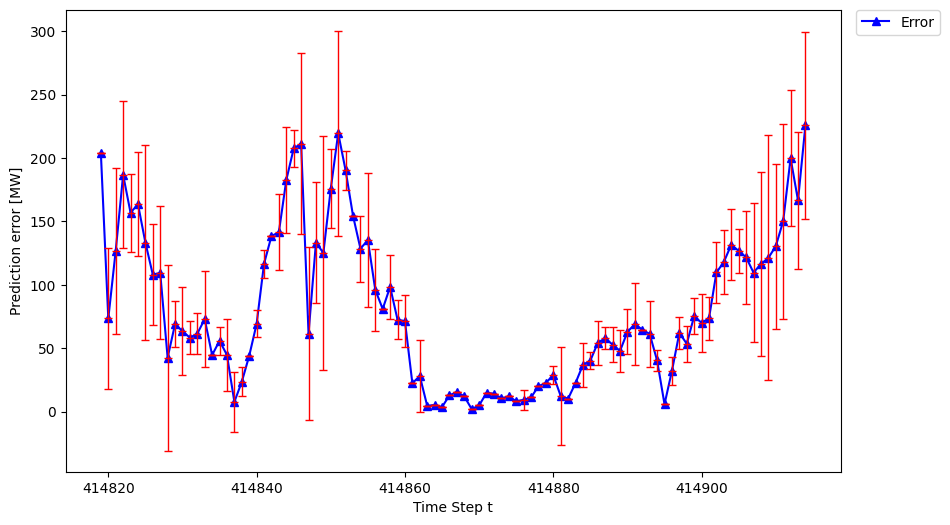

In [ ]:
plot_prediction_absolute_error_by_mean_std(case3_error_abs_value, sampling_interval=config.sampling_interval)

In [ ]:
tenpercent_tae = calculate_total_absolute_error(case3_error_abs_value)
print("TAE:", tenpercent_tae)

TAE: 7763.057637800001


In [ ]:
tenpercent_mae = calculate_mean_absolute_error(case3_error_abs_value)
print("MAE:", tenpercent_mae)

MAE: 80.86518372708333


## Case 4: Proposed

In [ ]:
case4_df = load_csv_data(config.case4_predict_results_path)
case4_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [ ]:
# true values need to be shifted by 1
true_values = case4_df["TRUE"][config.start+1:config.end+1+1]
true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [ ]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case4_predicted_values = case4_df[predicted_column][config.start:config.end+1]
case4_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5686.76,5686.76,5686.76,5686.76,5686.76,5686.76,5686.76,5686.76,5686.76,5686.76
414820,5562.76,5423.20,5562.76,5423.20,5562.76,5404.44,5686.76,5562.76,5562.76,5562.76
414821,5562.76,5285.34,5562.76,5423.20,5423.20,5423.20,5265.92,5285.34,5562.76,5562.76
414822,5386.32,5179.79,5423.20,5386.32,5423.20,5423.20,5386.32,5353.18,5423.20,5216.31
414823,5299.97,5144.05,5144.05,5386.32,5144.05,5144.05,5299.97,5144.05,5299.97,5144.05
...,...,...,...,...,...,...,...,...,...,...
414910,5899.63,6140.68,6088.19,6088.19,5899.63,6088.19,6088.19,6088.19,6088.19,6088.19
414911,5805.53,5998.93,6088.19,5862.03,5862.03,5998.93,5862.03,6036.93,6088.19,5998.93
414912,5926.77,5998.93,5926.77,5926.77,5720.11,5912.75,5926.77,5720.11,5926.77,5926.77
414913,5720.11,5720.11,5720.11,5926.77,5720.11,5720.11,5926.77,5720.11,5926.77,5825.17


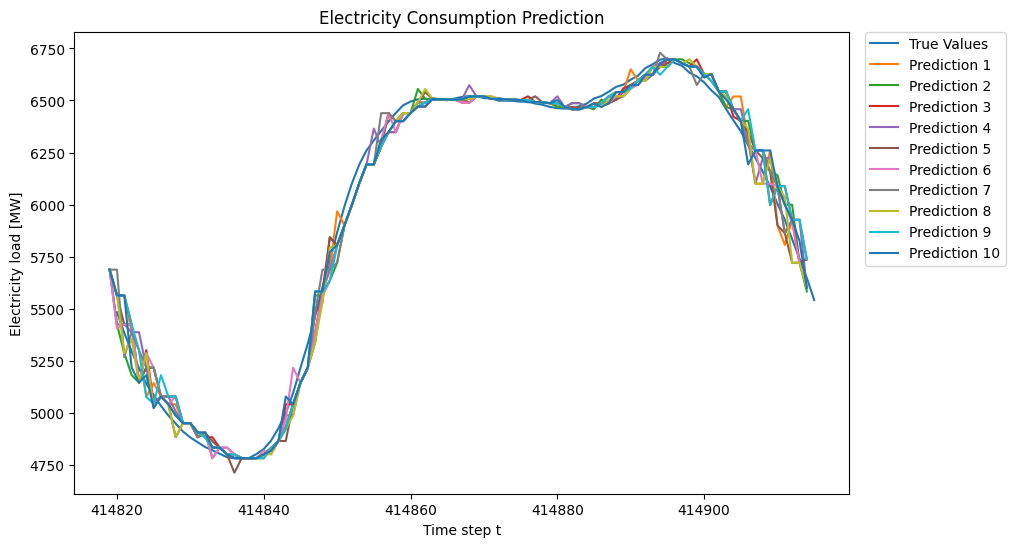

In [ ]:
plot_electricity_load(true_values, case4_predicted_values)

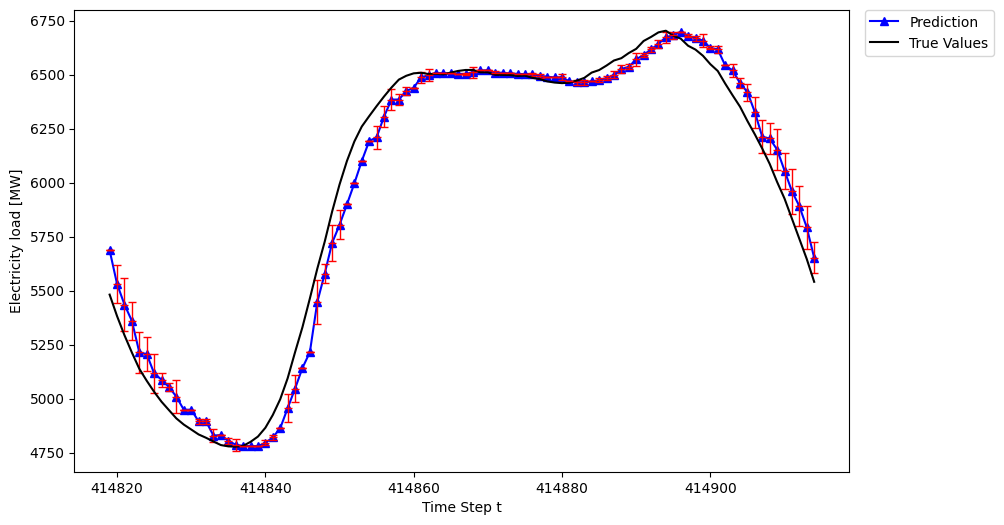

In [ ]:
plot_electricity_load_by_mean_std(true_values, case4_predicted_values, sampling_interval=config.sampling_interval)

In [ ]:
# abs(outputdata[n][a] - inputdata[a+1])
case4_error_abs_value = case4_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case4_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,205.0360,205.03600,205.03600,205.0360,205.03600,205.03600,205.0360,205.03600,205.036,205.03600
829736,180.3870,40.82610,180.38700,40.8261,180.38700,22.06210,304.3860,180.38700,180.387,180.38700
829737,268.8870,8.53006,268.88700,129.3260,129.32600,129.32600,27.9584,8.53006,268.887,268.88700
829738,172.5920,33.93990,209.47600,172.5920,209.47600,209.47600,172.5920,139.45500,209.476,2.58849
829739,161.4250,5.49676,5.49676,247.7670,5.49676,5.49676,161.4250,5.49676,161.425,5.49676
...,...,...,...,...,...,...,...,...,...,...
829826,26.8201,214.22800,161.74200,161.7420,26.82010,161.74200,161.7420,161.74200,161.742,161.74200
829827,27.9157,165.47500,254.74200,28.5800,28.58000,165.47500,28.5800,203.47900,254.742,165.47500
829828,186.7720,258.92500,186.77200,186.7720,19.89360,172.75100,186.7720,19.89360,186.772,186.77200
829829,73.5064,73.50640,73.50640,280.1720,73.50640,73.50640,280.1720,73.50640,280.172,178.57300


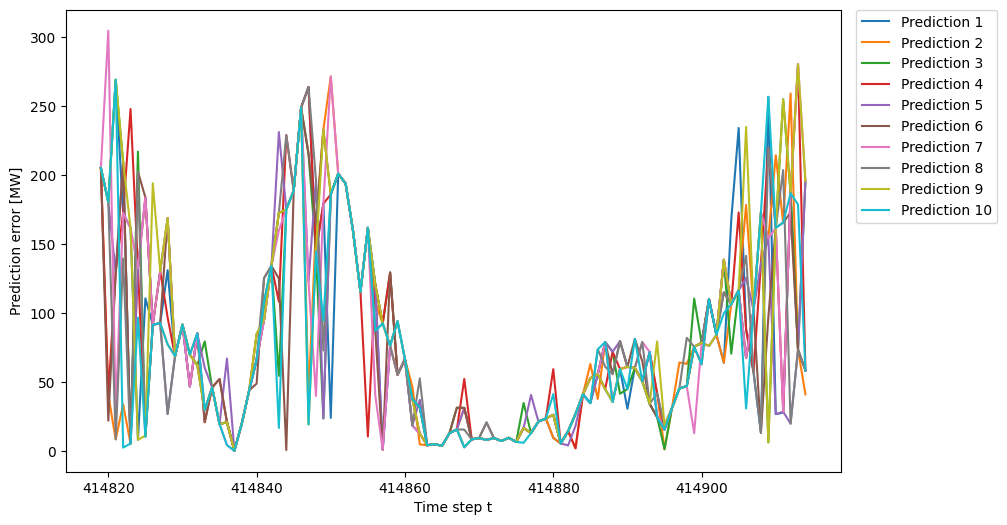

In [ ]:
plot_prediction_absolute_error(case4_error_abs_value)

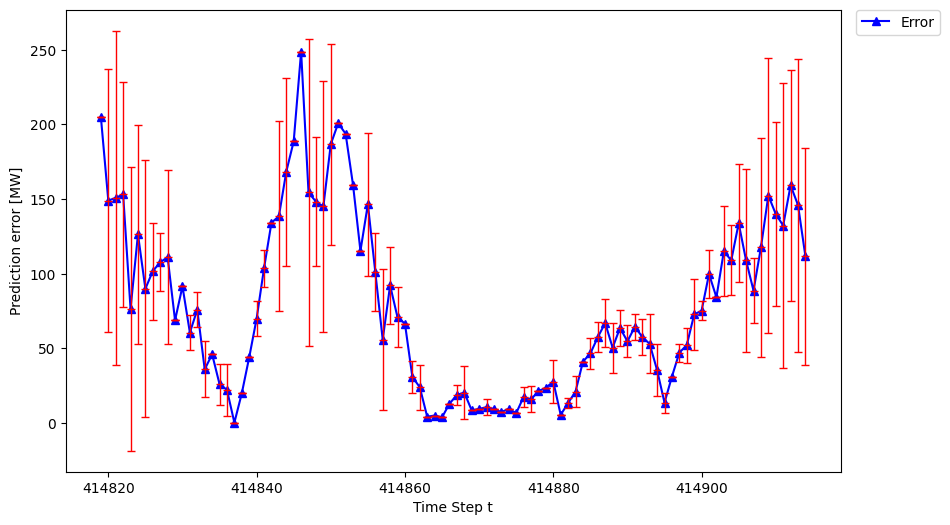

In [ ]:
plot_prediction_absolute_error_by_mean_std(case4_error_abs_value, sampling_interval=config.sampling_interval)

In [ ]:
firstyear_tae = calculate_total_absolute_error(case4_error_abs_value)
print("TAE:", firstyear_tae)

TAE: 7565.0652732


In [ ]:
firstyear_mae = calculate_mean_absolute_error(case4_error_abs_value)
print("MAE:", firstyear_mae)

MAE: 78.80276326250001


## Summary

In [ ]:
predicted_values_list = []
error_abs_value_list = []
mae_list = []
tae_list = []

predicted_values_list.append(predicted_values)
predicted_values_list.append(inf_predicted_values)
predicted_values_list.append(tenpercent_predicted_values)
predicted_values_list.append(firstyear_predicted_values)

error_abs_value_list.append(error_abs_value)
error_abs_value_list.append(inf_error_abs_value)
error_abs_value_list.append(tenpercent_error_abs_value)
error_abs_value_list.append(firstyear_error_abs_value)

mae_list.append(mae)
mae_list.append(inf_mae)
mae_list.append(tenpercent_mae)
mae_list.append(firstyear_mae)
tae_list.append(tae)
tae_list.append(inf_tae)
tae_list.append(tenpercent_tae)
tae_list.append(firstyear_tae)

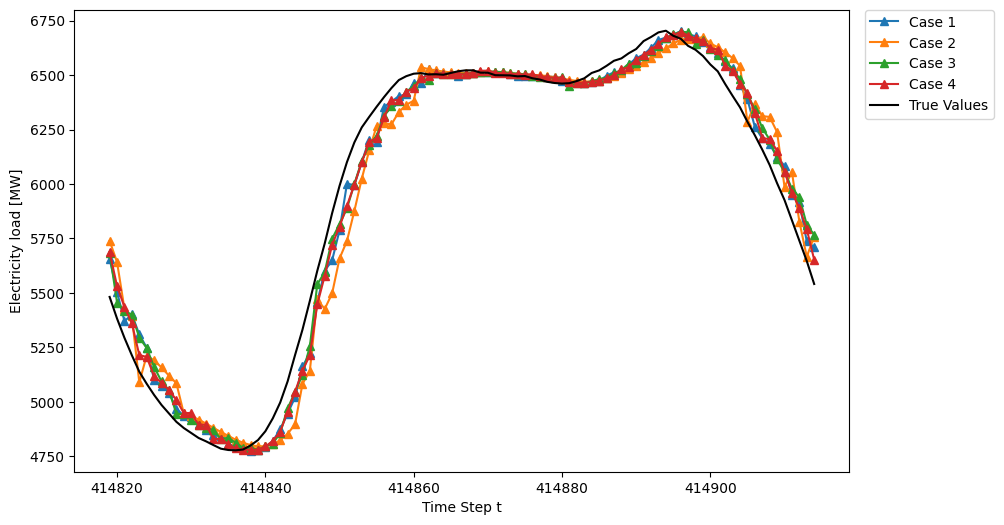

In [ ]:
plot_electricity_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)

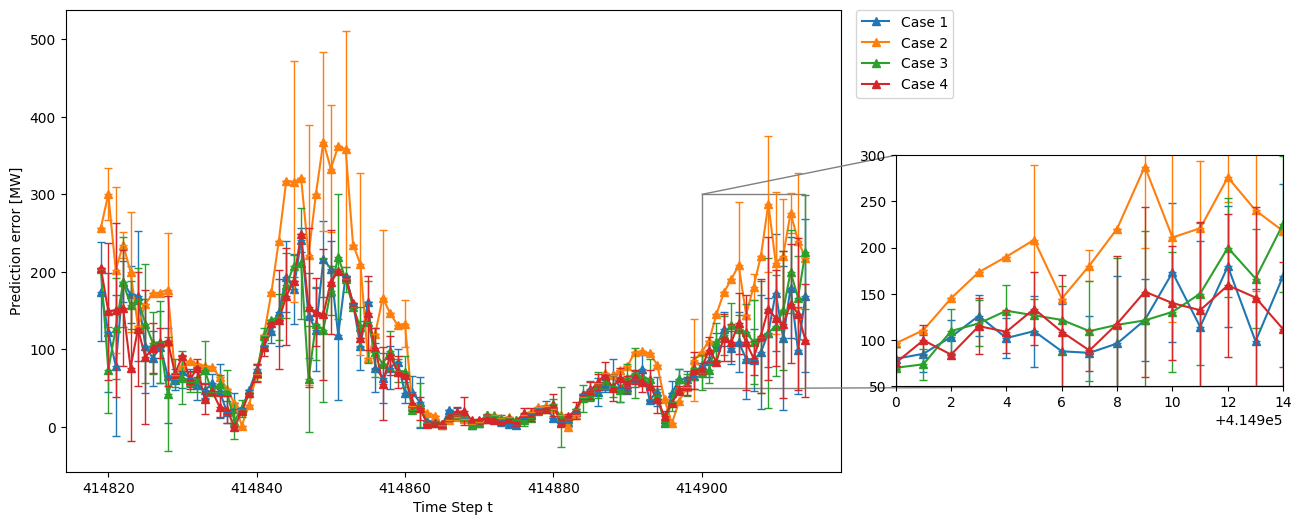

In [ ]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)

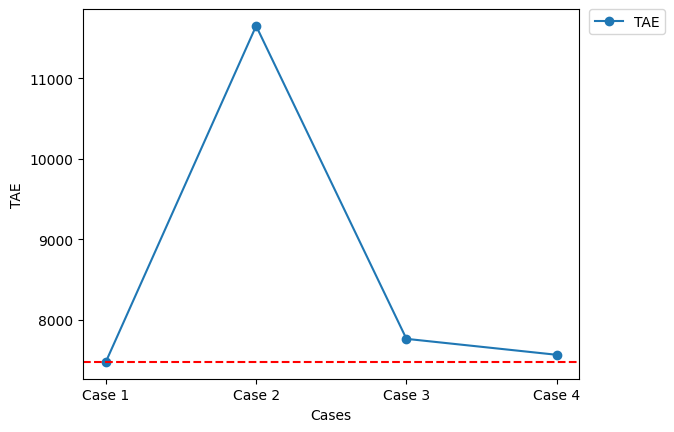

In [ ]:
plot_tae_list(tae_list)

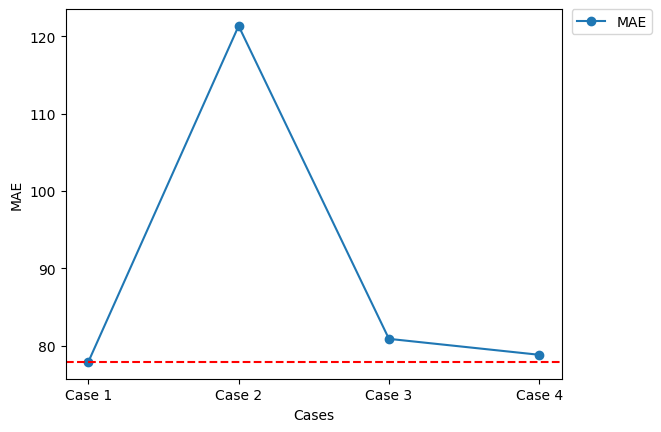

In [ ]:
plot_mae_list(mae_list)